In [6]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3ace676d494398eb3591083e29ca5bcb


In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

###
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | louisbourg
City not found. Skipping...
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | rundu
Processing Record 5 of Set 1 | hihifo
City not found. Skipping...
Processing Record 6 of Set 1 | erenhot
Processing Record 7 of Set 1 | florida
Processing Record 8 of Set 1 | rawannawi
City not found. Skipping...
Processing Record 9 of Set 1 | dikson
Processing Record 10 of Set 1 | yanggu
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | torbay
Processing Record 13 of Set 1 | nikolskoye
Processing Record 14 of Set 1 | alofi
Processing Record 15 of Set 1 | kruisfontein
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | flinders
Processing Record 18 of Set 1 | xadani
City not found. Skipping...
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | castro
Processing Record 21 o

Processing Record 42 of Set 4 | kodiak
Processing Record 43 of Set 4 | meyungs
City not found. Skipping...
Processing Record 44 of Set 4 | metro
Processing Record 45 of Set 4 | nicolae balcescu
Processing Record 46 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 47 of Set 4 | libreville
Processing Record 48 of Set 4 | san policarpo
Processing Record 49 of Set 4 | sitka
Processing Record 50 of Set 4 | los banos
Processing Record 1 of Set 5 | kati
Processing Record 2 of Set 5 | port hardy
Processing Record 3 of Set 5 | fevralsk
City not found. Skipping...
Processing Record 4 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 5 of Set 5 | kijabe
Processing Record 6 of Set 5 | new rochelle
Processing Record 7 of Set 5 | bonavista
Processing Record 8 of Set 5 | arivonimamo
Processing Record 9 of Set 5 | karaul
City not found. Skipping...
Processing Record 10 of Set 5 | san-pedro
Processing Record 11 of Set 5 | morehead
Processing Record 12 of Set 5 | puer

Processing Record 27 of Set 8 | olafsvik
Processing Record 28 of Set 8 | hailey
Processing Record 29 of Set 8 | bezenchuk
Processing Record 30 of Set 8 | bairiki
Processing Record 31 of Set 8 | beverley
Processing Record 32 of Set 8 | synya
Processing Record 33 of Set 8 | murchison
Processing Record 34 of Set 8 | seminole
Processing Record 35 of Set 8 | rusape
Processing Record 36 of Set 8 | la ronge
Processing Record 37 of Set 8 | touros
Processing Record 38 of Set 8 | naugarzan
City not found. Skipping...
Processing Record 39 of Set 8 | orotukan
Processing Record 40 of Set 8 | bandarbeyla
Processing Record 41 of Set 8 | tuensang
Processing Record 42 of Set 8 | plotnikovo
Processing Record 43 of Set 8 | laramie
Processing Record 44 of Set 8 | hope
Processing Record 45 of Set 8 | andenes
Processing Record 46 of Set 8 | evensk
Processing Record 47 of Set 8 | puerto colombia
Processing Record 48 of Set 8 | placido de castro
Processing Record 49 of Set 8 | moose factory
Processing Record 

Processing Record 16 of Set 12 | dunda
Processing Record 17 of Set 12 | rio gallegos
Processing Record 18 of Set 12 | mountain home
Processing Record 19 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 20 of Set 12 | atambua
Processing Record 21 of Set 12 | flagstaff
Processing Record 22 of Set 12 | nishihara
Processing Record 23 of Set 12 | great falls
Processing Record 24 of Set 12 | huinan
Processing Record 25 of Set 12 | fallon
Processing Record 26 of Set 12 | kpandae
Processing Record 27 of Set 12 | bajil
Processing Record 28 of Set 12 | calbuco
Processing Record 29 of Set 12 | coracora
Processing Record 30 of Set 12 | sinnamary
Processing Record 31 of Set 12 | belushya guba
City not found. Skipping...
Processing Record 32 of Set 12 | gerash
Processing Record 33 of Set 12 | mount isa
Processing Record 34 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 35 of Set 12 | coos bay
Processing Record 36 of Set 12 | ereymentau
Processing Record 37 of 

In [12]:
print(len(city_data))

565


In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.93,18.42,66.20,68,75,32.21,ZA,2020-11-07 14:16:32
1,Punta Arenas,-53.15,-70.92,57.20,54,75,18.34,CL,2020-11-07 14:13:24
2,Rundu,-17.93,19.77,101.70,11,19,4.14,NA,2020-11-07 14:16:32
3,Erenhot,43.65,111.98,29.35,76,0,6.69,CN,2020-11-07 14:16:32
4,Florida,28.75,-82.50,78.01,88,40,11.41,US,2020-11-07 14:13:08
5,Dikson,73.51,80.55,-1.88,89,2,9.31,RU,2020-11-07 14:16:33
6,Yanggu,36.11,115.78,54.16,36,0,2.73,CN,2020-11-07 14:16:33
7,Georgetown,5.41,100.34,80.60,88,40,3.36,MY,2020-11-07 14:15:05
8,Torbay,47.67,-52.73,55.00,87,90,41.38,CA,2020-11-07 14:16:33
9,Nikolskoye,59.70,30.79,51.80,71,0,13.42,RU,2020-11-07 14:16:33


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(20)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2020-11-07 14:16:32,-33.93,18.42,66.20,68,75,32.21
1,Punta Arenas,CL,2020-11-07 14:13:24,-53.15,-70.92,57.20,54,75,18.34
2,Rundu,NA,2020-11-07 14:16:32,-17.93,19.77,101.70,11,19,4.14
3,Erenhot,CN,2020-11-07 14:16:32,43.65,111.98,29.35,76,0,6.69
4,Florida,US,2020-11-07 14:13:08,28.75,-82.50,78.01,88,40,11.41
5,Dikson,RU,2020-11-07 14:16:33,73.51,80.55,-1.88,89,2,9.31
6,Yanggu,CN,2020-11-07 14:16:33,36.11,115.78,54.16,36,0,2.73
7,Georgetown,MY,2020-11-07 14:15:05,5.41,100.34,80.60,88,40,3.36
8,Torbay,CA,2020-11-07 14:16:33,47.67,-52.73,55.00,87,90,41.38
9,Nikolskoye,RU,2020-11-07 14:16:33,59.70,30.79,51.80,71,0,13.42


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [19]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")

today

'11/07/20'

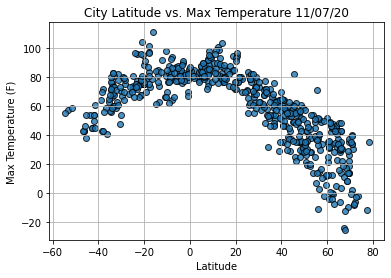

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

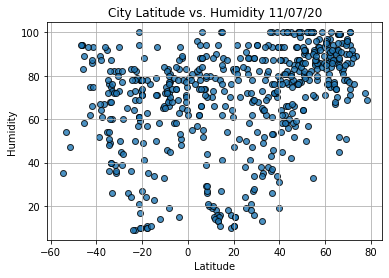

In [21]:
# Build the scatter plot for latitude vs. Humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

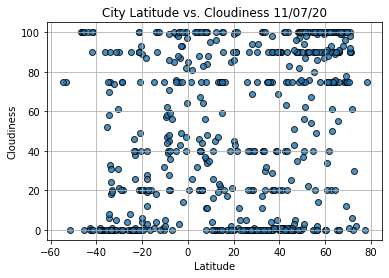

In [22]:
# Build the scatter plot for latitude vs. Cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

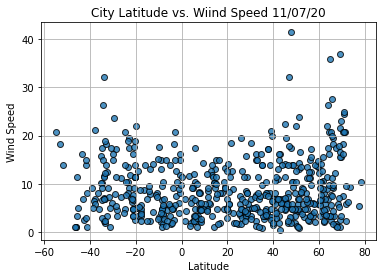

In [23]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wiind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()